In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
from utils import *
np.set_printoptions(precision=3)

# 0. Grab data from csv file

In [4]:
with open('BCH-USD_10_2_18.csv') as csvfile:
    read = csv.reader(csvfile, delimiter=',')
    data = list(read)

In [6]:
attributes = data[0]
print(attributes)

datalen = len(data)

date = [None]*(datalen-1)
open = [None]*(datalen-1)
high = [None]*(datalen-1)
low = [None]*(datalen-1)
close = [None]*(datalen-1)
adjclose = [None]*(datalen-1)
vol = [None]*(datalen-1)

for x in range(1,datalen):
    date[x-1]     = data[x][0]
    open[x-1]     = data[x][1]
    high[x-1]     = data[x][2]
    low[x-1]      = data[x][3]
    close[x-1]    = data[x][4]
    adjclose[x-1] = data[x][5]
    vol[x-1]      = data[x][6]

datalen=datalen-1    

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


[array(220.3), array(3715.91)]


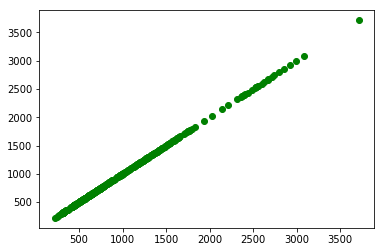

In [7]:
formatx = [[] for i in range(datalen)]

minX=float('inf')
maxX=float('-inf')

for x in range (0,datalen):
    formatx[x].append(open[x])
    
formaty = [[] for i in range(datalen)]

for x in range (0,datalen):
    formaty[x].append(open[x])



x = np.array(formatx,dtype=float)
y = np.array(formaty,dtype=float)

x.reshape(1,datalen)
y.reshape(1,datalen)


for i in np.nditer(x):
        if (i>maxX):
            #print(i)
            maxX=i
        if (i<minX):
            #print(x)
            minX=i
            
#define range of x values
x_range = [None]*2
x_range[0]=minX
x_range[1]=maxX
            
print(x_range)
    
plt.scatter(x, y, color='green')

3.6235581055612903e-26


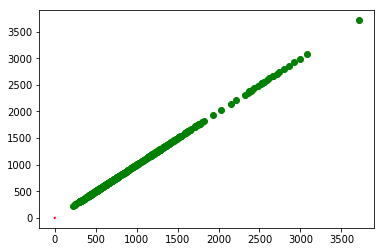

In [210]:
linear_coeff, err = least_squares(x, y)
plt.scatter(x, y, color='green')
plot_linear(linear_coeff)
print(err)

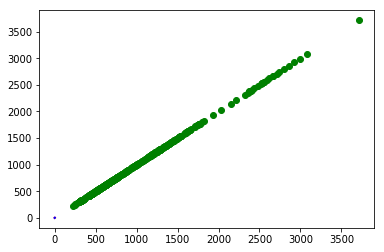

In [211]:
w_fit_right = np.array([[1.7]])
w_closer_right = np.array([[0.75]])
plt.scatter(x, y, color='green')
plot_linear(linear_coeff, color='red')
plot_linear(w_fit_right, color='blue')
plot_linear(w_closer_right, color='purple')

In [212]:
def mse(x, y, w):
    return np.mean((x.dot(w) - y)**2)

In [213]:
print("Regression error", mse(x, y, linear_coeff))
print("Purple line", mse(x, y, w_closer_right))
print("Blue line", mse(x, y, w_fit_right))

Regression error 3.6235581055612903e-26
Purple line 83079.25214075766
Blue line 651341.33678354


# Find error to train

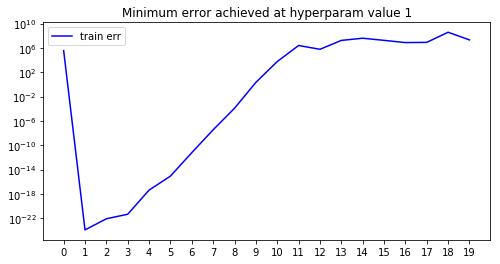

In [214]:
errs = []
ws = []
for i in range(20):
    w, err = least_squares(polynomial_features(x, i), y)
    errs.append(err)
    ws.append(w)

plt.figure(figsize=(8, 4))
plot_errors(errs)

# Train model

In [215]:
N_TRAIN = datalen 
x_train, y_train = x[:N_TRAIN], y[:N_TRAIN]
x_val, y_val = x[N_TRAIN:], y[N_TRAIN:]

In [216]:
errs_train = []
ws_train = []
errs_val = []
for i in range(20):
    w, err = least_squares(polynomial_features(x_train, i), y_train)
    errs_train.append(err)
    errs_val.append(validation_error(x_val, y_val, w))
    ws_train.append(w)

C:\Users\DalbostaLT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DalbostaLT\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Graph hyperparam effect

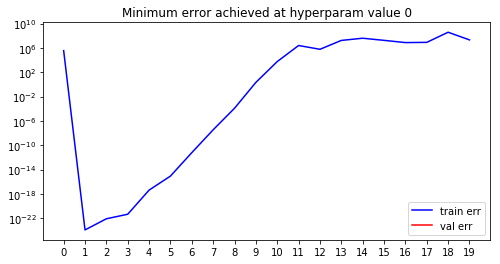

In [217]:
plt.figure(figsize=(8, 4))
plot_errors(errs_train, label="train err", color='b')
plot_errors(errs_val, label="val err", color="r")

# 2. Regularization

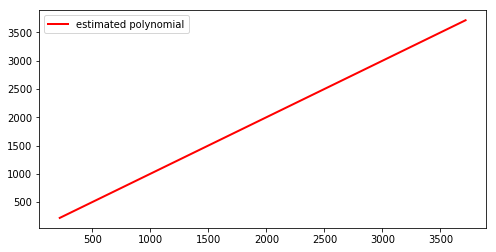

In [218]:
features_4 = polynomial_features(x, 4)
w, err = least_squares(features_4, y)

plt.figure(figsize=(8, 4))
plot_polynomial(w, x_range=x_range, color='r', label='estimated polynomial')
plt.legend()

In [219]:
print("Estimated coeffs", w.flatten())

Estimated coeffs [-3.513e-09  1.000e+00 -5.151e-16  3.070e-20  9.939e-24]


In [220]:
np.linalg.eig(features_4.T.dot(features_4))[0]

array([0.000e+00, 1.045e+29, 6.134e+20, 3.189e+13, 7.166e+06])

## Ridge regression

In [221]:
def ridge_regression(x, y, l=1.0):
    # TODO: modify linear regression to avoid numerical instability
    xTx = x.T.dot(x)
    w = np.linalg.inv(xTx + l * np.eye(xTx.shape[0])).dot(x.T.dot(y))
    err = np.mean((x.dot(w) - y) ** 2)
    return w, err

### test algorithim

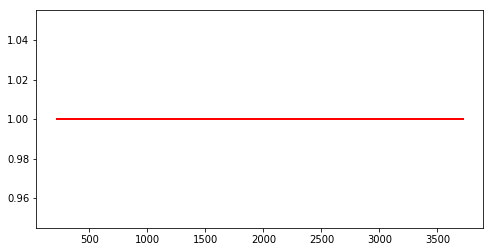

In [222]:
LAMBDA = 50
w, err = ridge_regression(x, y, l=LAMBDA)
plt.figure(figsize=(8, 4))
plot_polynomial(w, x_range=x_range)

In [223]:
print("Estimated coeffs", w.flatten())

Estimated coeffs [1.]
